## 1. Data Preparation and Cleaning

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the datasets
train_df = pd.read_excel("F:/NAGESH_N/Device-price-classification-system/python_model/data/train.xlsx")
test_df = pd.read_excel("F:/NAGESH_N/Device-price-classification-system/python_model/data/test.xlsx")


# Check column names and the first few rows of the dataset
print("Columns in train_df:", train_df.columns)
print("First few rows of train_df:")
print(train_df.head())

# Remove any leading/trailing spaces in column names
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

# Check again after stripping spaces
print("Columns in train_df after cleaning:", train_df.columns)

# Handle missing values by filling with median for numerical columns
train_df.fillna(train_df.median(), inplace=True)
test_df.fillna(test_df.median(), inplace=True)

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encoding categorical columns
categorical_columns = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
for col in categorical_columns:
    train_df[col] = label_encoder.fit_transform(train_df[col])

# Prepare feature matrix (X) and target vector (y)
if 'id' in train_df.columns:
    X = train_df.drop(columns=['price_range', 'id'])  # Drop the target and ID columns
else:
    X = train_df.drop(columns=['price_range'])  # Just drop the target column if 'id' is missing

y = train_df['price_range']

# Print the first few rows of processed data
print("Feature matrix X and target y:")
print(X.head())
print(y.head())


Columns in train_df: Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
First few rows of train_df:
   battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0            842     0          2.2         0   1.0     0.0         7.0   
1           1021     1          0.5         1   0.0     1.0        53.0   
2            563     1          0.5         1   2.0     1.0        41.0   
3            615     1          2.5         0   0.0     0.0        10.0   
4           1821     1          1.2         0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0    0.6      188.0      2.0  ...       20.0     756.0  2549.0   9.0   7.0   
1    0.7      136.0      3.0  ...      905.0    1988.0  2631.

## 2. Exploratory Data Analysis (EDA)

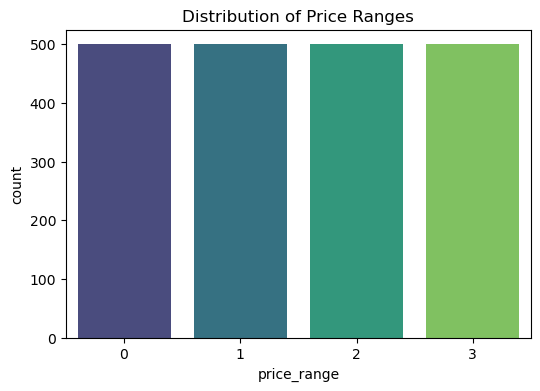

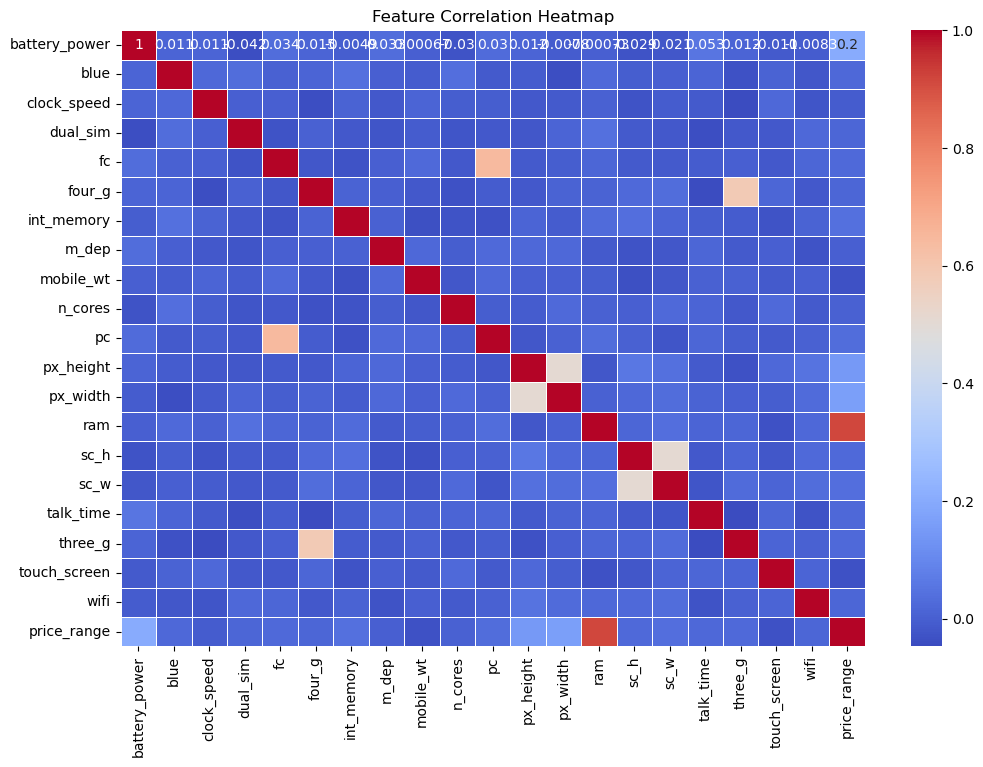

In [14]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='price_range', data=train_df, palette='viridis')
plt.title('Distribution of Price Ranges')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


## 3. Model Training and Evaluation

In [15]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.88      0.86      0.87        91
           2       0.79      0.85      0.82        92
           3       0.93      0.88      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400

Confusion Matrix:
[[101   4   0   0]
 [  5  78   8   0]
 [  0   7  78   7]
 [  0   0  13  99]]


## 4. Model Optimization

In [27]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.88      0.84      0.86        91
           2       0.78      0.87      0.82        92
           3       0.94      0.88      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.88       400
weighted avg       0.89      0.89      0.89       400



In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)



Model Accuracy: 0.89
Confusion Matrix:
 [[101   4   0   0]
 [  5  78   8   0]
 [  0   7  78   7]
 [  0   0  13  99]]


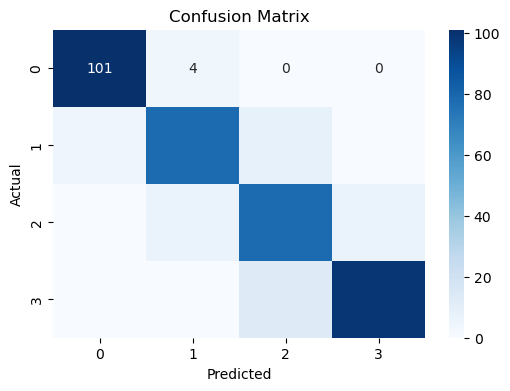

In [30]:
# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


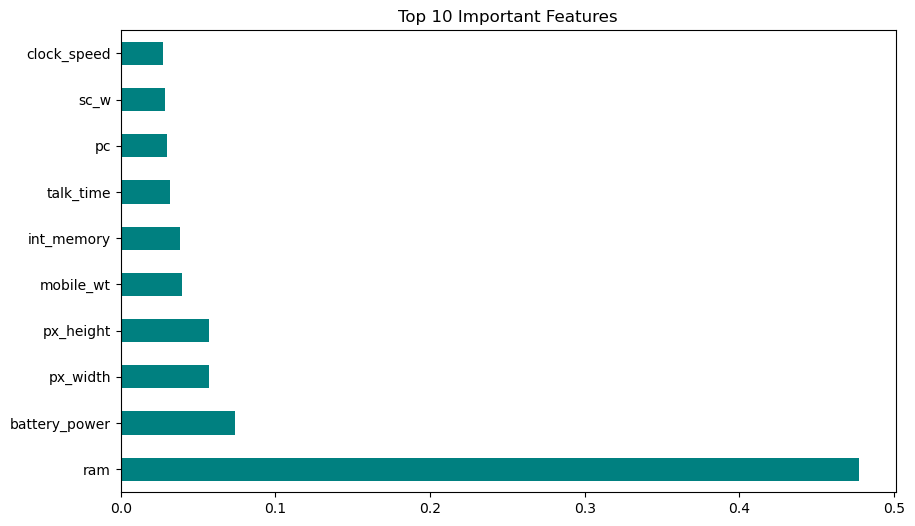

In [32]:
# Feature Importance
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Important Features")
plt.show()